In [1]:
import os
import sys
import torch

# Add the parent folder of the current working directory to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

Reorganizando vídeos em pastas para garantir o formato necessário para a classe torchvision

In [ ]:
from src.data.data_preparation import move_videos_to_class_folders

src_dir = "../data/Raw/UCF101"
dest_root = "../data/Split/UCF101"

# move_videos_to_class_folders(src_dir, dest_root)

Gerando versão do dataset customizada

In [ ]:
from src.data.data_preparation import split_data_generate_annotations
# Configurações
dataset_root = "../data/Split/UCF101-filtered"
output_dir = "../data/Split/split_info-filtered"
train_ratio = 0.8  # 80% treino, 20% teste

# Mapeamento de classes para labels
class_to_label = {
    "ApplyEyeMakeup": 0,
    "ApplyLipstick": 1,
    "BlowDryHair": 2,
    "BrushingTeeth": 3,
    "Haircut": 4,
    "Background": 5
}

# split_data_generate_annotations(
#     dataset_root,
#     output_dir,
#     train_ratio=train_ratio,
#     class_to_label=class_to_label
# )

#### Train dataset - with background

In [ ]:
from src.data.ucf101_dataset import load_ucf101_dataset

DATA_PATH = "../data/Split/UCF101-filtered"
ANNOT_PATH = "../data/Split/split_info-filtered"
FRAMES_PER_CLIP = 16
STEP_BETWEEN_CLIPS = 16

train_loader, test_loader = load_ucf101_dataset(
    DATA_PATH,
    ANNOT_PATH,
    FRAMES_PER_CLIP,
    STEP_BETWEEN_CLIPS,
    batch_size=55,
    num_workers=0
)

High LR, with background class

In [ ]:
from src.train.model import load_new_model
from src.train.train import train_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_new_model(num_classes=6, pretrained=True, device=device, freeze_params=True)
learning_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

checkpoint_dir = '../checkpoints/UCF101-filtered-lr0.01-backgroundclass'
trained_model, metrics = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    save_path=checkpoint_dir
)

Lower LR, with background class

In [ ]:
from src.train.model import load_new_model
from src.train.train import train_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_new_model(num_classes=6, pretrained=True, device=device, freeze_params=True)
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

checkpoint_dir = '../checkpoints/UCF101-filtered-lr0.001-backgroundclass'
trained_model, metrics = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=30,
    save_path=checkpoint_dir
)

#### Train dataset - no background

In [2]:
from src.data.ucf101_dataset import load_ucf101_dataset

DATA_PATH = "../data/Split/UCF101-nobackground"
ANNOT_PATH = "../data/Split/split_info-nobackground"
FRAMES_PER_CLIP = 16
STEP_BETWEEN_CLIPS = 8

train_loader, test_loader = load_ucf101_dataset(
    DATA_PATH,
    ANNOT_PATH,
    FRAMES_PER_CLIP,
    STEP_BETWEEN_CLIPS,
    batch_size=55,
)

100%|██████████| 41/41 [00:21<00:00,  1.93it/s]


High LR, nobackground

In [ ]:
from src.train.model import load_new_model
from src.train.train import train_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_new_model(num_classes=5, pretrained=True, device=device, freeze_params=True)
learning_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

checkpoint_dir = '../checkpoints/UCF101-filtered-lr0.01-nobackgroundclass'
trained_model, metrics = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    save_path=checkpoint_dir
)

In [ ]:
from src.train.model import load_new_model
from src.train.train import train_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_new_model(num_classes=5, pretrained=True, device='cuda', freeze_params=True)
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

checkpoint_dir = '../checkpoints/UCF101-filtered-lr0.001-nobackgroundclass'
trained_model, metrics = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    save_path=checkpoint_dir
)

In [ ]:
from src.train.model import load_new_model
from src.train.train import train_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_new_model(num_classes=5, pretrained=True, device='cuda', freeze_params=True)
learning_rate = 0.0001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

checkpoint_dir = '../checkpoints/UCF101-filtered-lr0.0001-nobackgroundclass'
trained_model, metrics = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    save_path=checkpoint_dir
)

#### train, full unfrozen model, no background

#### Loading unfrozen model

High LR, nobackground

In [ ]:
from src.train.model import load_new_model
from src.train.train import train_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_new_model(num_classes=5, pretrained=True, device='cuda', freeze_params=False)
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

checkpoint_dir = '../checkpoints/UCF101-filtered-lr0.001-nobackgroundclass-fullunfrozen'
trained_model, metrics = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    save_path=checkpoint_dir
)

In [ ]:
from src.train.model import load_new_model
from src.train.train import train_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_new_model(num_classes=5, pretrained=True, device='cuda', freeze_params=False)
learning_rate = 0.00001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

checkpoint_dir = '../checkpoints/UCF101-filtered-lr0.0001-nobackgroundclass-fullunfrozen'
trained_model, metrics = train_model(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optimizer=optimizer,
    device=device,
    num_epochs=10,
    save_path=checkpoint_dir
)

#### Evaluation

c:\Mestrado\personal-care-action-recognition\venv\lib\site-packages\torchvision\io\video.py:197: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")



Overall Accuracy: 93.75%
Total Test Samples: 4833

Classification Report:
                precision    recall  f1-score   support

ApplyEyeMakeup     0.9608    0.9518    0.9563       954
 ApplyLipstick     0.9799    0.9407    0.9599       725
   BlowDryHair     0.8743    0.9508    0.9110      1119
 BrushingTeeth     0.9700    0.9806    0.9753      1286
       Haircut     0.9126    0.8224    0.8652       749

      accuracy                         0.9375      4833
     macro avg     0.9395    0.9293    0.9335      4833
  weighted avg     0.9386    0.9375    0.9373      4833



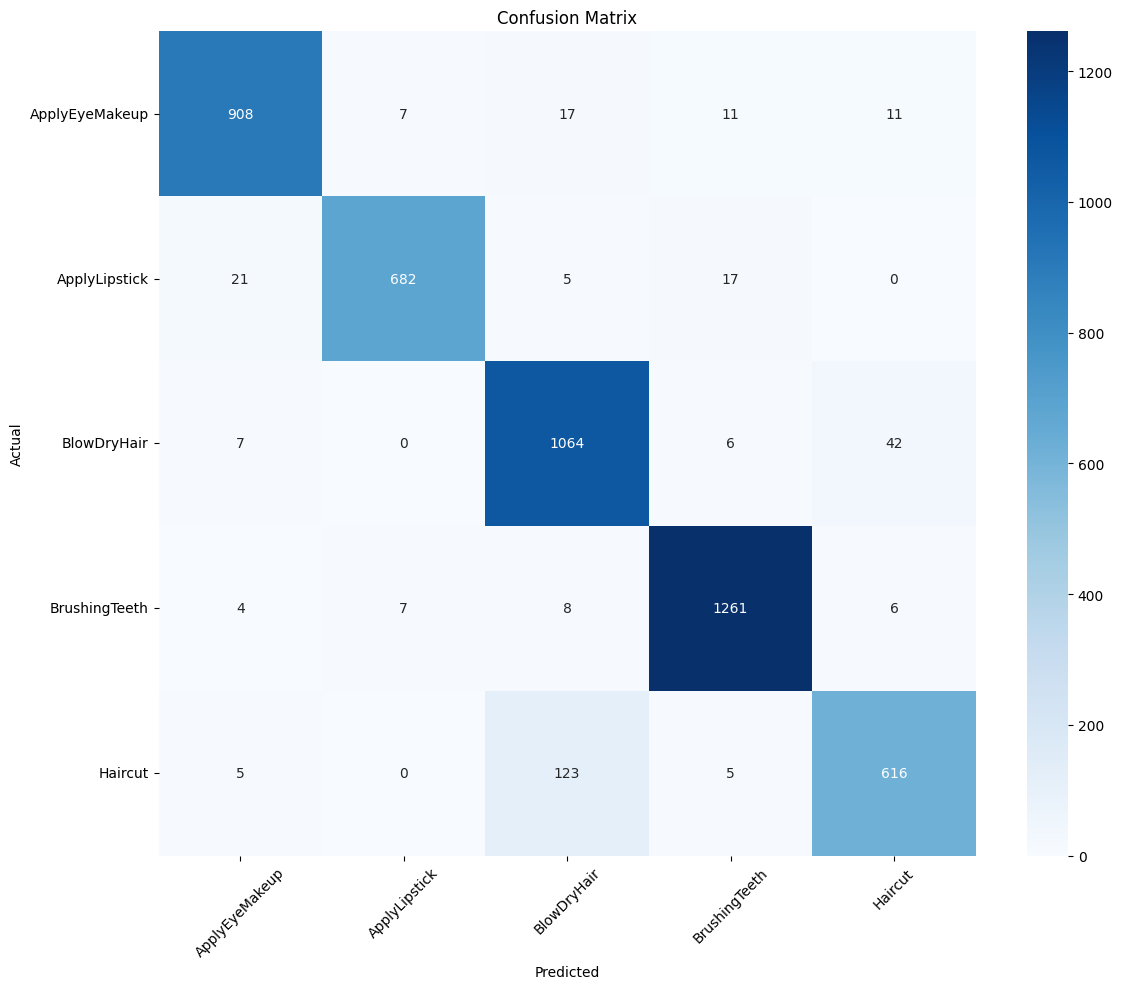

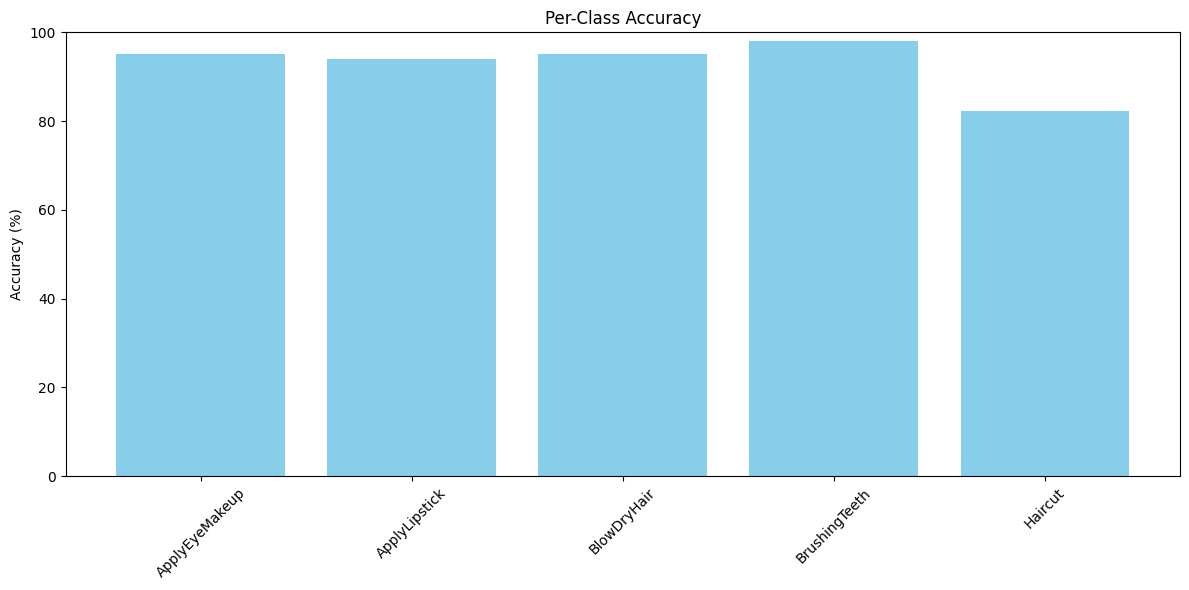

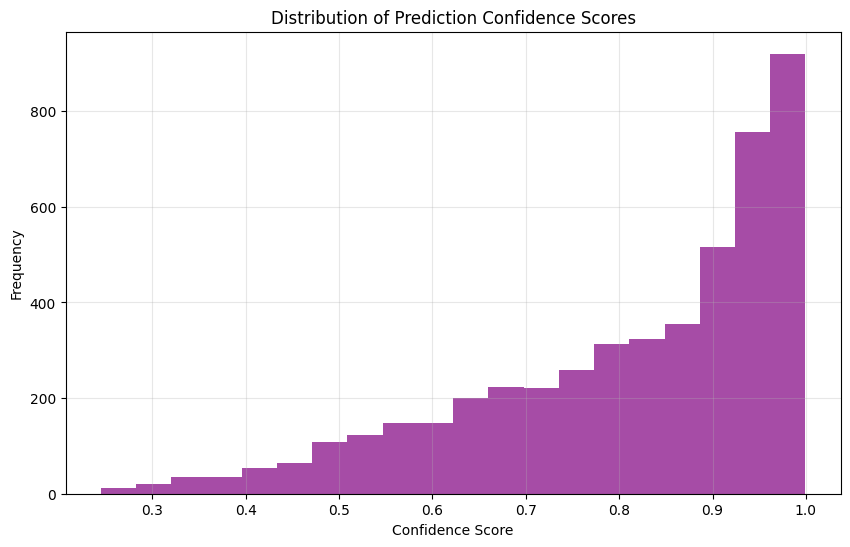


Class-wise Performance:
ApplyEyeMakeup : 908/954 = 95.18%
ApplyLipstick  : 682/725 = 94.07%
BlowDryHair    : 1064/1119 = 95.08%
BrushingTeeth  : 1261/1286 = 98.06%
Haircut        : 616/749 = 82.24%


In [3]:
from src.train.evaluate import evaluate_model
from src.train.model import load_new_model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_new_model(num_classes=5, pretrained=True, device='cuda', freeze_params=True)
checkpoint_path = "../checkpoints/UCF101-filtered-lr0.0001-nobackgroundclass/model_e_10.pth"
model.load_state_dict(torch.load(checkpoint_path))
model.eval()
model.to(device)

# Example usage:
class_names = ['ApplyEyeMakeup',
'ApplyLipstick',
'BlowDryHair',
'BrushingTeeth',
'Haircut',]
accuracy, cm = evaluate_model(model, test_loader, device, class_names)